In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("employees_attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data_dummies=pd.get_dummies(data)

In [6]:
data_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [7]:
data_dummies["target"]=data_dummies["Attrition"]

In [8]:
data_dummies= data_dummies.drop(columns=["Attrition"])

In [9]:
data_dummies.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [10]:
X=data_dummies.iloc[:,:-1]

In [11]:
Y=data_dummies.iloc[:,-1]

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(train_x,train_y)
pred=dtc.predict(test_x)
acc=accuracy_score(test_y,pred)
cm=confusion_matrix(test_y,pred)
print("accuracy=",acc)
print("confusion matrix=",cm)


accuracy= 0.8367346938775511
confusion matrix= [[227  24]
 [ 24  19]]


In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

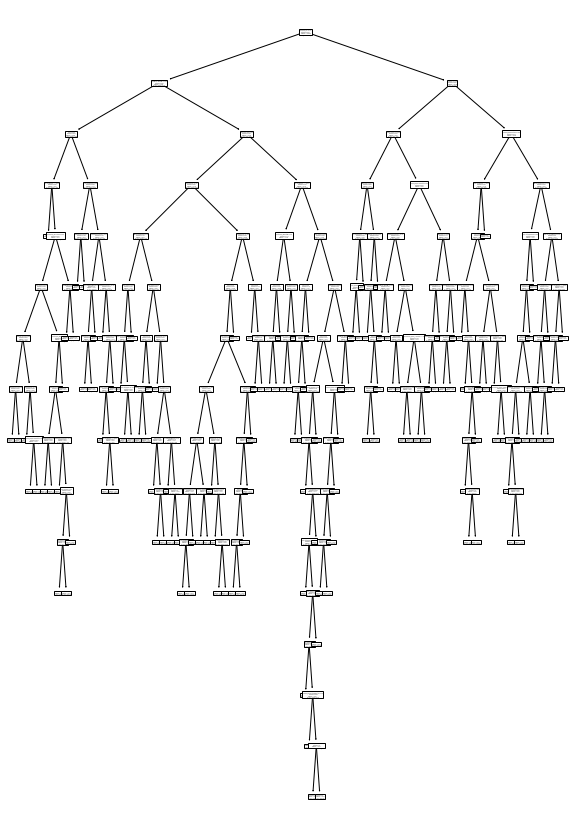

In [30]:
plt.figure(figsize=(10,15))
tree.plot_tree(dtc.fit(train_x,train_y),precision=3,proportion=True,feature_names=list(train_x.columns))
plt.show()

In [31]:
clf=DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=10,min_samples_leaf=5,max_depth=4)
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [33]:
pred=clf.predict(test_x)
acc=accuracy_score(test_y,pred)
cm=confusion_matrix(test_y,pred)
print("accuracy=",acc)
print("confusion matrix=",cm)


accuracy= 0.8707482993197279
confusion matrix= [[248   3]
 [ 35   8]]


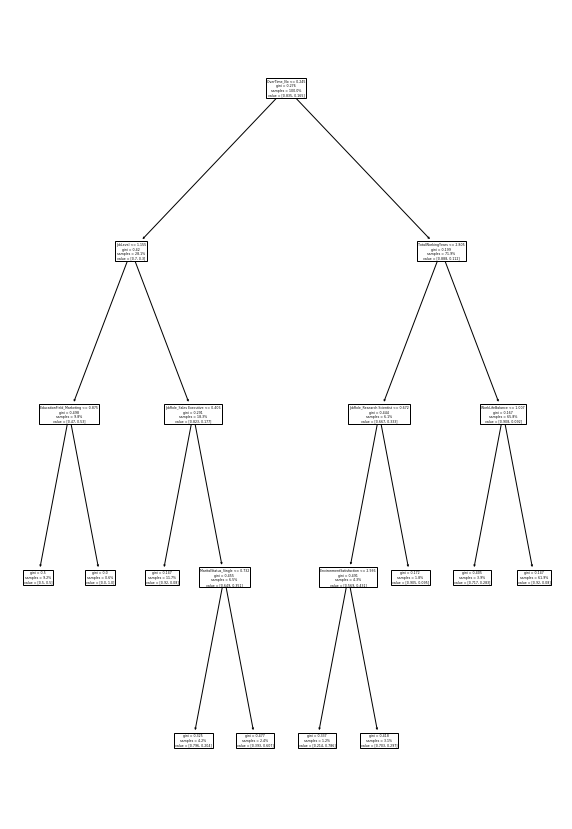

In [35]:
plt.figure(figsize=(10,15))
tree.plot_tree(clf.fit(train_x,train_y),precision=3,proportion=True,feature_names=list(train_x.columns))
plt.show()